# 多类别语义分割数据集预处理

同济子豪兄 2023-2-13

## 导入工具包

In [20]:
import os

import numpy as np
import cv2

from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
os.getcwd()

'/home/featurize/work/MMSegmentation教程/【D2】迪拜卫星航拍多类别语义分割/【A】数据集预处理'

## 可视化原始语义分割标注图像

In [22]:
PATH_MASKS = 'masks-old'

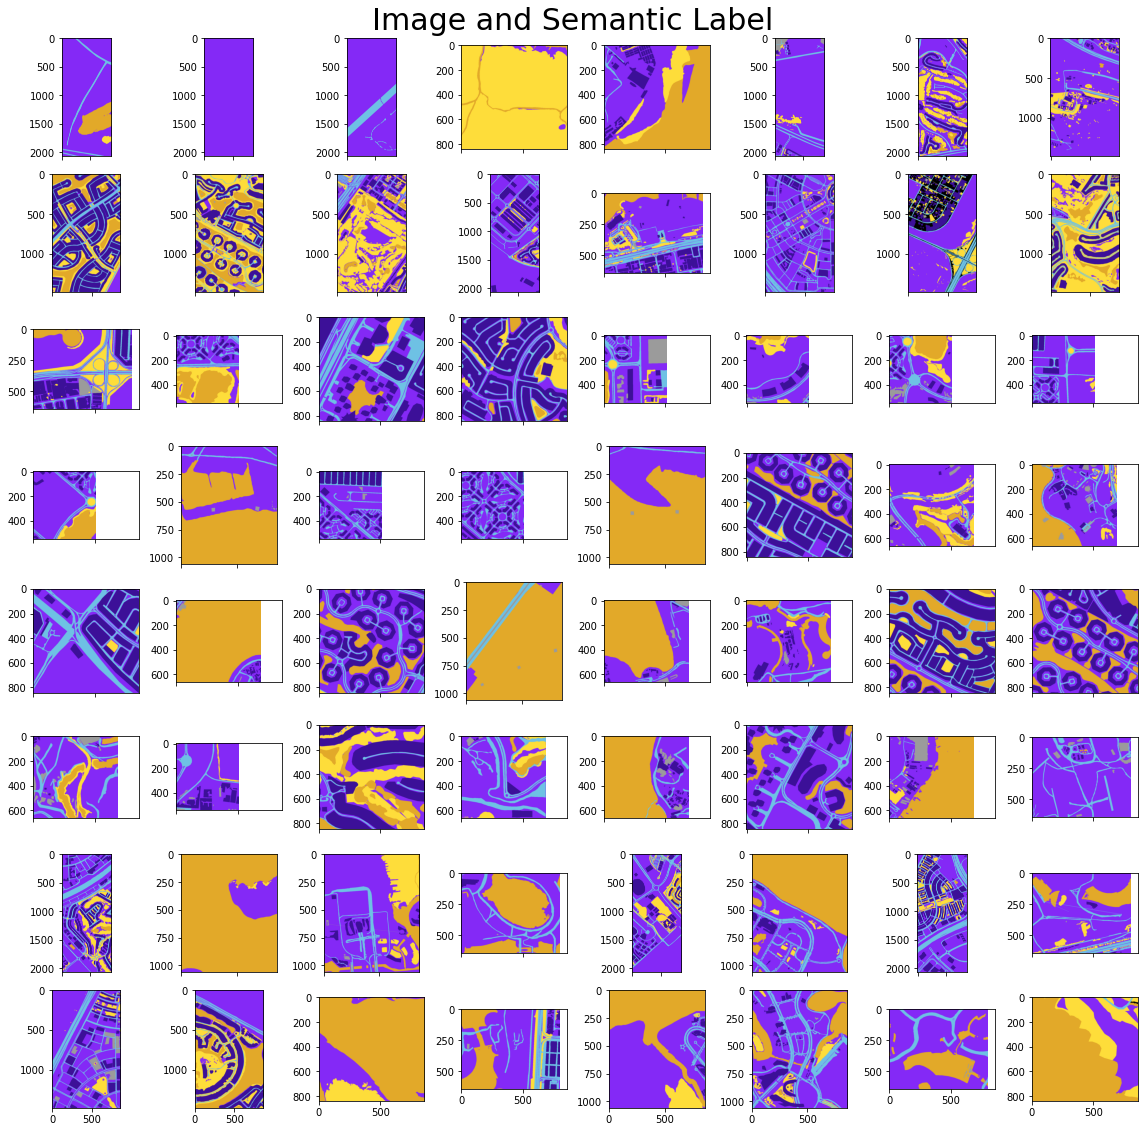

In [23]:
# n行n列可视化
n = 8

# 标注区域透明度
opacity = 0.8

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(16,16))

for i, file_name in enumerate(os.listdir(PATH_MASKS)[:n**2]):
    
    # 载入图像和标注
    # img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name)
    # img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    # 可视化
    # axes[i//n, i%n].imshow(img)
    # axes[i//n, i%n].imshow(mask*50, alpha=opacity)
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    axes[i//n, i%n].imshow(mask)
    # axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()

## 载入语义分割标注图片（三通道彩图）

In [24]:
img = cv2.imread('1.png')

In [25]:
img.shape

(644, 797, 3)

In [26]:
img[0,:,:].shape

(797, 3)

In [27]:
img[0,:,:]

array([[246,  41, 132],
       [246,  41, 132],
       [246,  41, 132],
       ...,
       [246,  41, 132],
       [246,  41, 132],
       [246,  41, 132]], dtype=uint8)

## 类别、ID、颜色对应关系

| 类别编号 | 类别名称   | R    | G    | B    | HEX     |
| -------- | ---------- | ---- | ---- | ---- | ------- |
| 0        | Land       | 246  | 41   | 132  | #8429F6 |
| 1        | Road       | 110  | 193  | 228  | #6EC1E4 |
| 2        | Building   | 60   | 16   | 152  | #3C1098 |
| 3        | Vegetation | 254  | 221  | 58   | #FEDD3A |
| 4        | Water      | 226  | 169  | 41   | #E2A929 |
| 5        | Unlabeled  | 155  | 155  | 155  | #9B9B9B |




In [28]:
palette_list = [
    ['Land', [132,41,246]],
    ['Road', [228,193,110]],
    ['Building', [152,16,60]],
    ['Vegetation', [58,221,254]],
    ['Water', [41,169,226]],
    ['Unlabeled', [155,155,155]]
]

In [29]:
mask = np.zeros(img.shape[:2])
for idx, each in enumerate(palette_list): # 遍历每个类别
    COLOR = each[1]
    mask_class = np.where(np.all(img == COLOR, axis=-1)) # 找到该类别区域
    mask[mask_class] = idx # 将该类别区域设为整数ID

## 获得单通道语义分割标注图片

In [30]:
mask.shape

(644, 797)

In [31]:
np.unique(mask)

array([0., 1., 2., 3., 4., 5.])

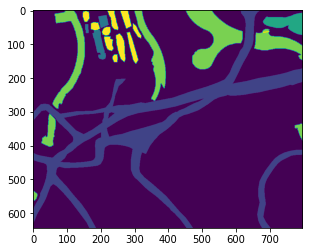

In [32]:
plt.imshow(mask)
plt.show()

## 保存单通道语义分割标注图为png图片

In [33]:
cv2.imwrite('mask.png', mask)

True

## 载入png图片，可视化

In [34]:
mask_new = cv2.imread('mask.png')

In [35]:
np.unique(mask_new)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

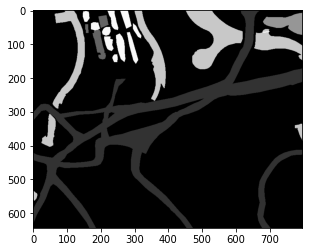

In [36]:
plt.imshow(mask_new*50)
plt.show()

## 定义函数

In [37]:
def channel_3to1(img_path):
    img = cv2.imread(img_path)
    mask = np.zeros(img.shape[:2])
    for idx, each in enumerate(palette_list): # 遍历每个类别
        COLOR = each[1]
        mask_class = np.where(np.all(img == COLOR, axis=-1)) # 找到该类别区域
        mask[mask_class] = idx # 将该类别区域设为整数ID
    return mask

In [59]:
!rm -rf ../masks-new

In [60]:
os.mkdir('../masks-new')

In [62]:
os.chdir('masks-old')

In [63]:
os.getcwd()

'/home/featurize/work/MMSegmentation教程/【D2】迪拜卫星航拍多类别语义分割/【A】数据集预处理/masks-old'

In [58]:
!rm -rf .DS_Store .ipynb_checkpoints masks-new

In [64]:
for img_path in tqdm(os.listdir()):
    mask = channel_3to1(img_path)
    cv2.imwrite('../masks-new/'+img_path, mask)

100%|██████████| 72/72 [00:16<00:00,  4.39it/s]


In [39]:
len(os.listdir())

72

In [57]:
img_path

'masks-new'